In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [3]:
dataset_dir = os.path.join(os.getcwd(), 'c:/Users/estef/Downloads/MLproject/cats_dogs_birds_filtered')

dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_train_cats_len = len(os.listdir(os.path.join(dataset_train_dir, 'cat')))
dataset_train_dogs_len = len(os.listdir(os.path.join(dataset_train_dir, 'dog')))
dataset_train_birds_len = len(os.listdir(os.path.join(dataset_train_dir, 'bird')))

print('Train Cats: %s' % dataset_train_cats_len)
print('Train Dogs: %s' % dataset_train_dogs_len)
print('Train Birds: %s' % dataset_train_birds_len)

Train Cats: 4015
Train Dogs: 5180
Train Birds: 4149


In [4]:
dataset_validation_cats_len = len(os.listdir(os.path.join(dataset_train_dir, 'cat')))
dataset_validation_dogs_len = len(os.listdir(os.path.join(dataset_train_dir, 'dog')))
dataset_validation_birds_len = len(os.listdir(os.path.join(dataset_train_dir, 'bird')))

print('Validation Cats: %s' % dataset_validation_cats_len)
print('Validation Dogs: %s' % dataset_validation_dogs_len)
print('Validation Birds: %s' % dataset_validation_birds_len)

Validation Cats: 4015
Validation Dogs: 5180
Validation Birds: 4149


In [5]:
image_width = 320
image_height = 320
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel,)

batch_size = 32
epochs = 20
learning_rate = 0.0001

class_names = ['bird', 'cat', 'dog']

In [6]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 13344 files belonging to 3 classes.


In [7]:
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = (image_width, image_height),
    batch_size = batch_size,
    shuffle = True
)

Found 13344 files belonging to 3 classes.


In [8]:
dataset_validation_cardinality = tf.data.experimental.cardinality(dataset_validation)
dataset_validation_batches = dataset_validation_cardinality // 5

dataset_test = dataset_validation.take(dataset_validation_batches)
dataset_validation = dataset_validation.skip(dataset_validation_batches)

print('Validation Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_validation))
print('Test Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_test))

Validation Dataset Cardinality: 334
Test Dataset Cardinality: 83


In [9]:
autotune = tf.data.AUTOTUNE

dataset_train = dataset_train.prefetch(buffer_size = autotune)
dataset_validation = dataset_validation.prefetch(buffer_size = autotune)
dataset_test = dataset_validation.prefetch(buffer_size = autotune)

In [10]:
def plot_dataset(dataset):

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, labels in dataset.take(1):

        for i in range(9):

            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])

<Figure size 432x288 with 0 Axes>

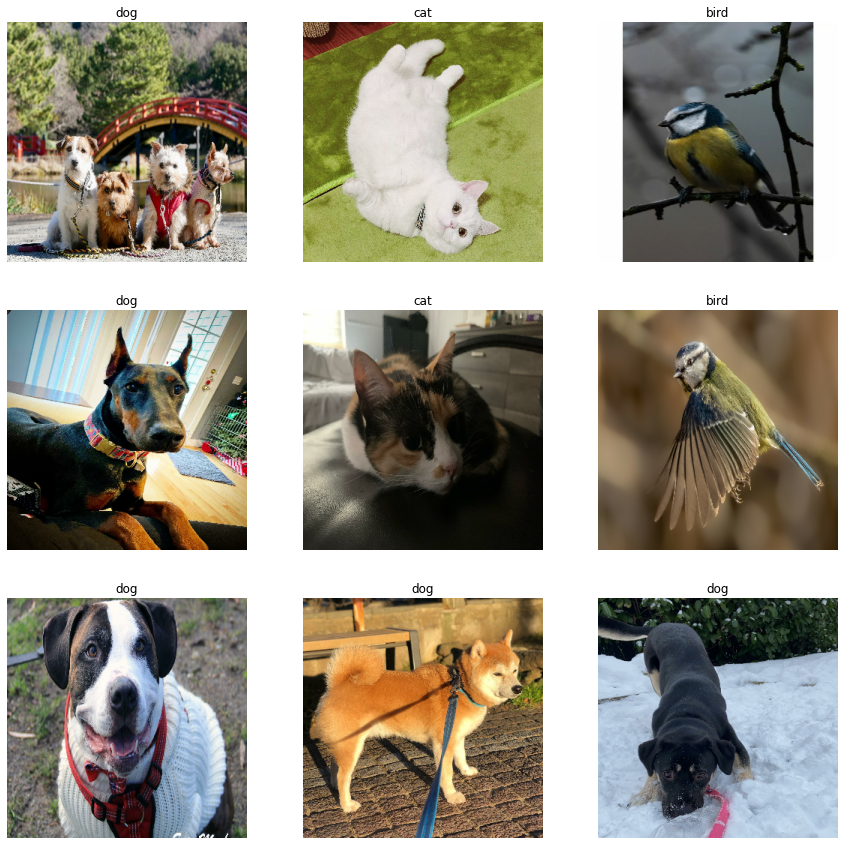

In [11]:
plot_dataset(dataset_train)

<Figure size 432x288 with 0 Axes>

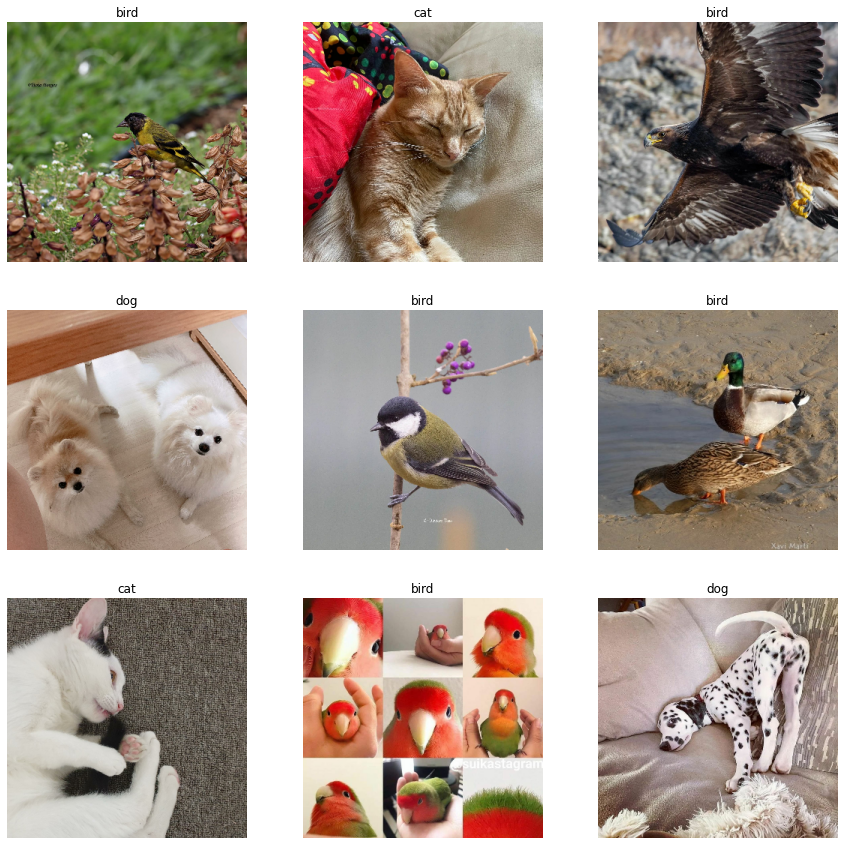

In [12]:
plot_dataset(dataset_validation)

<Figure size 432x288 with 0 Axes>

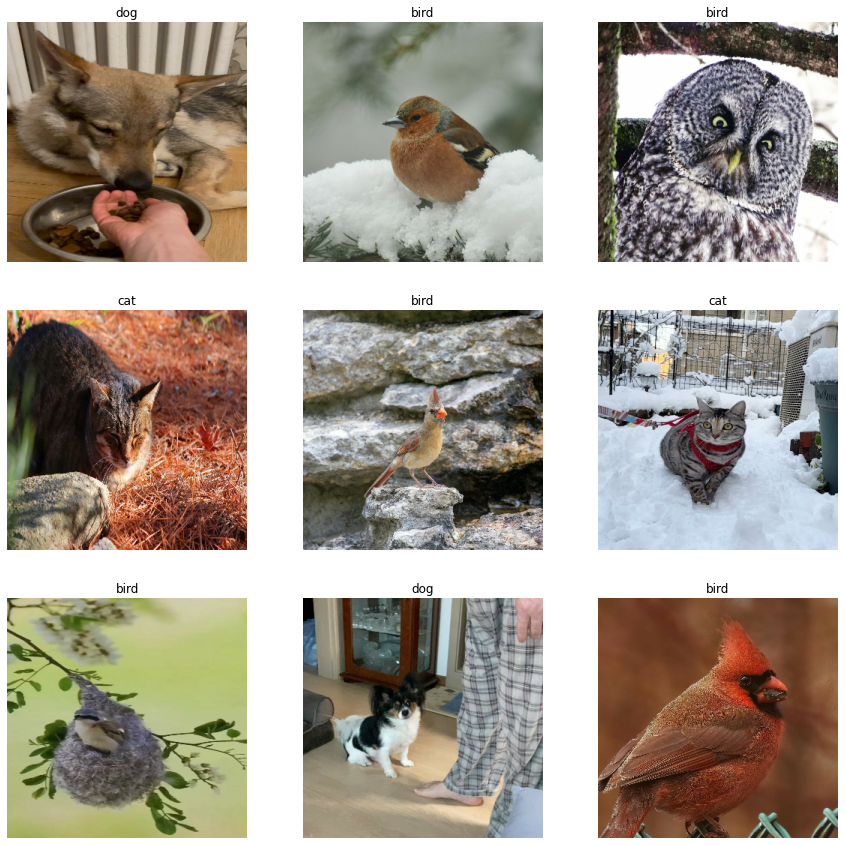

In [13]:
plot_dataset(dataset_test)